<a href="https://colab.research.google.com/github/PolyGon-13/DataScience_Study/blob/main/practice/Decision_Tree_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Jupyter Notebook용 : 그래프가 별도의 창에서 나타나지 않도록 함
%matplotlib inline

In [44]:
df=pd.read_csv('./data/diabetes.csv')
df.shape

(768, 9)

In [45]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
(df['Insulin']>0).value_counts()

,count
Insulin,
True,394
False,374


In [47]:
train=df[df['Insulin']>0].copy()
train.shape

(394, 9)

In [48]:
test=df[df['Insulin']==0].copy()
test.shape

(374, 9)

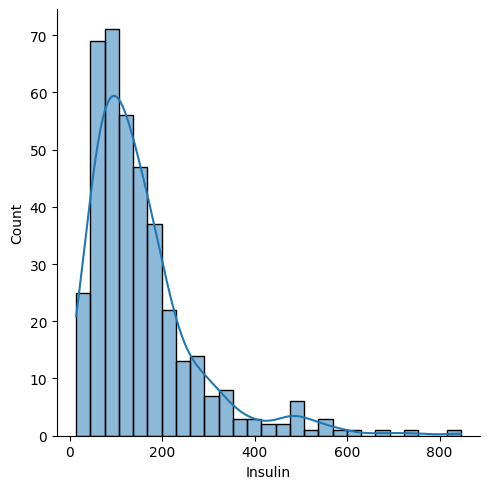

In [49]:
sns.displot(data=train,x='Insulin',kde=True)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Insulin'>

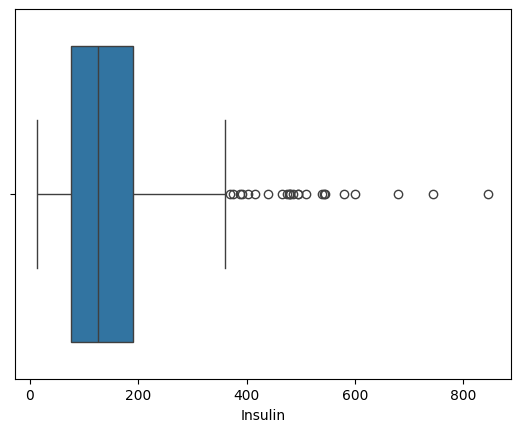

In [50]:
sns.boxplot(data=train,x='Insulin')

In [51]:
desc=train['Insulin'].describe()
desc

,Insulin
count,394.000000
mean,155.548223
std,118.775855
min,14.000000
25%,76.250000
50%,125.000000
75%,190.000000
max,846.000000


In [52]:
# IQR(Interquartile Range, 사분위 범위) : 데이터의 중간 50%를 나타내는 범위
# IQR이 클수록 데이터가 흩어져 있고, 작을수록 데이터가 좁은 범위에 집중되어 있음
IQR=desc.loc['75%']-desc.loc['25%']
# OUT : 이상치를 탐지하기 위한 기준 설정. 일반적으로 3사분위수에서 IQR의 1.5를 더한 값을 이상치 경계로 간주함.
OUT=desc.loc['75%']+(IQR*1.5)

In [53]:
train[train['Insulin']>OUT].shape

(24, 9)

In [54]:
print(train.shape)
train=train[train['Insulin']<OUT]
train.shape

(394, 9)


(370, 9)

In [55]:
# 학습, 예측에 사용할 열
feature_names=test.columns.tolist()
feature_names.remove('Insulin')
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [56]:
# 정답값이자 예측해야 될 값
label_name='Insulin'
label_name

'Insulin'

In [57]:
X_train=train[feature_names]
X_train.shape

(370, 8)

In [58]:
y_train=train[label_name]
y_train.shape

(370,)

In [59]:
X_test=test[feature_names]
X_test.shape

(374, 8)

In [60]:
y_test=test[label_name]
y_test.shape

(374,)

In [61]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor(random_state=42)
model

DecisionTreeRegressor(random_state=42)

In [62]:
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [67]:
from sklearn.model_selection import cross_val_predict

y_predict=cross_val_predict(model,X_train,y_train,cv=5,verbose=2,n_jobs=-1)
print(y_predict[:5])

[ 25. 182.  55. 144. 220.]
[ 94 168  88 175 230]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [66]:
(y_predict==y_train).sum()

7

In [65]:
len(y_train)

370

<Axes: xlabel='Insulin'>

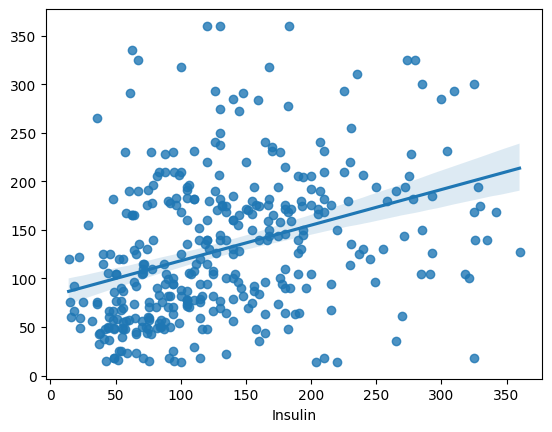

In [68]:
sns.regplot(x=y_train,y=y_predict)

In [69]:
from sklearn.metrics import r2_score

r2_score(y_train,y_predict) # 결정계수

-0.28551906710833275

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

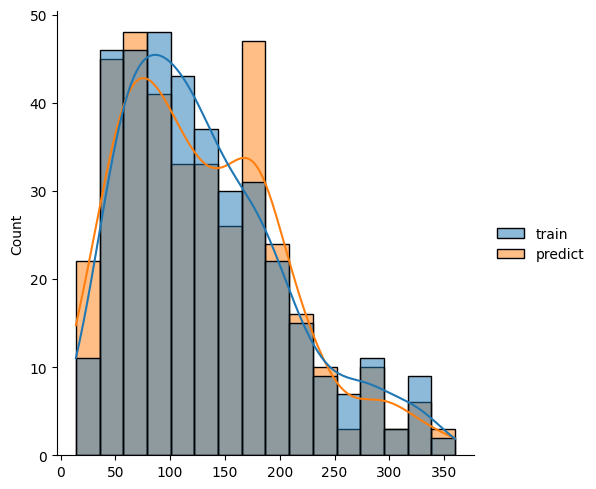

In [71]:
sns.displot(data=pd.DataFrame({'train':y_train,'predict':y_predict}),kde=True)

In [73]:
# 오차 구하기
error=abs(y_train-y_predict)
error.mean()

62.056756756756755

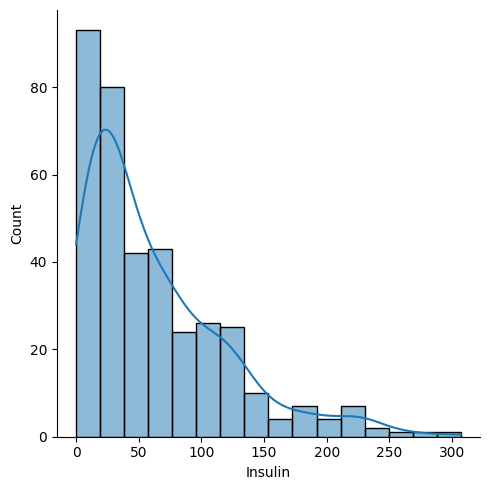

In [74]:
sns.displot(error,kde=True)

In [75]:
error.describe()

,Insulin
count,370.000000
mean,62.056757
std,56.854443
min,0.000000
25%,19.250000
50%,42.500000
75%,89.750000
max,307.000000


In [76]:
np.sqrt(((y_train-y_predict)**2).mean()) # 평균 제곱근 오차

84.11142866717003

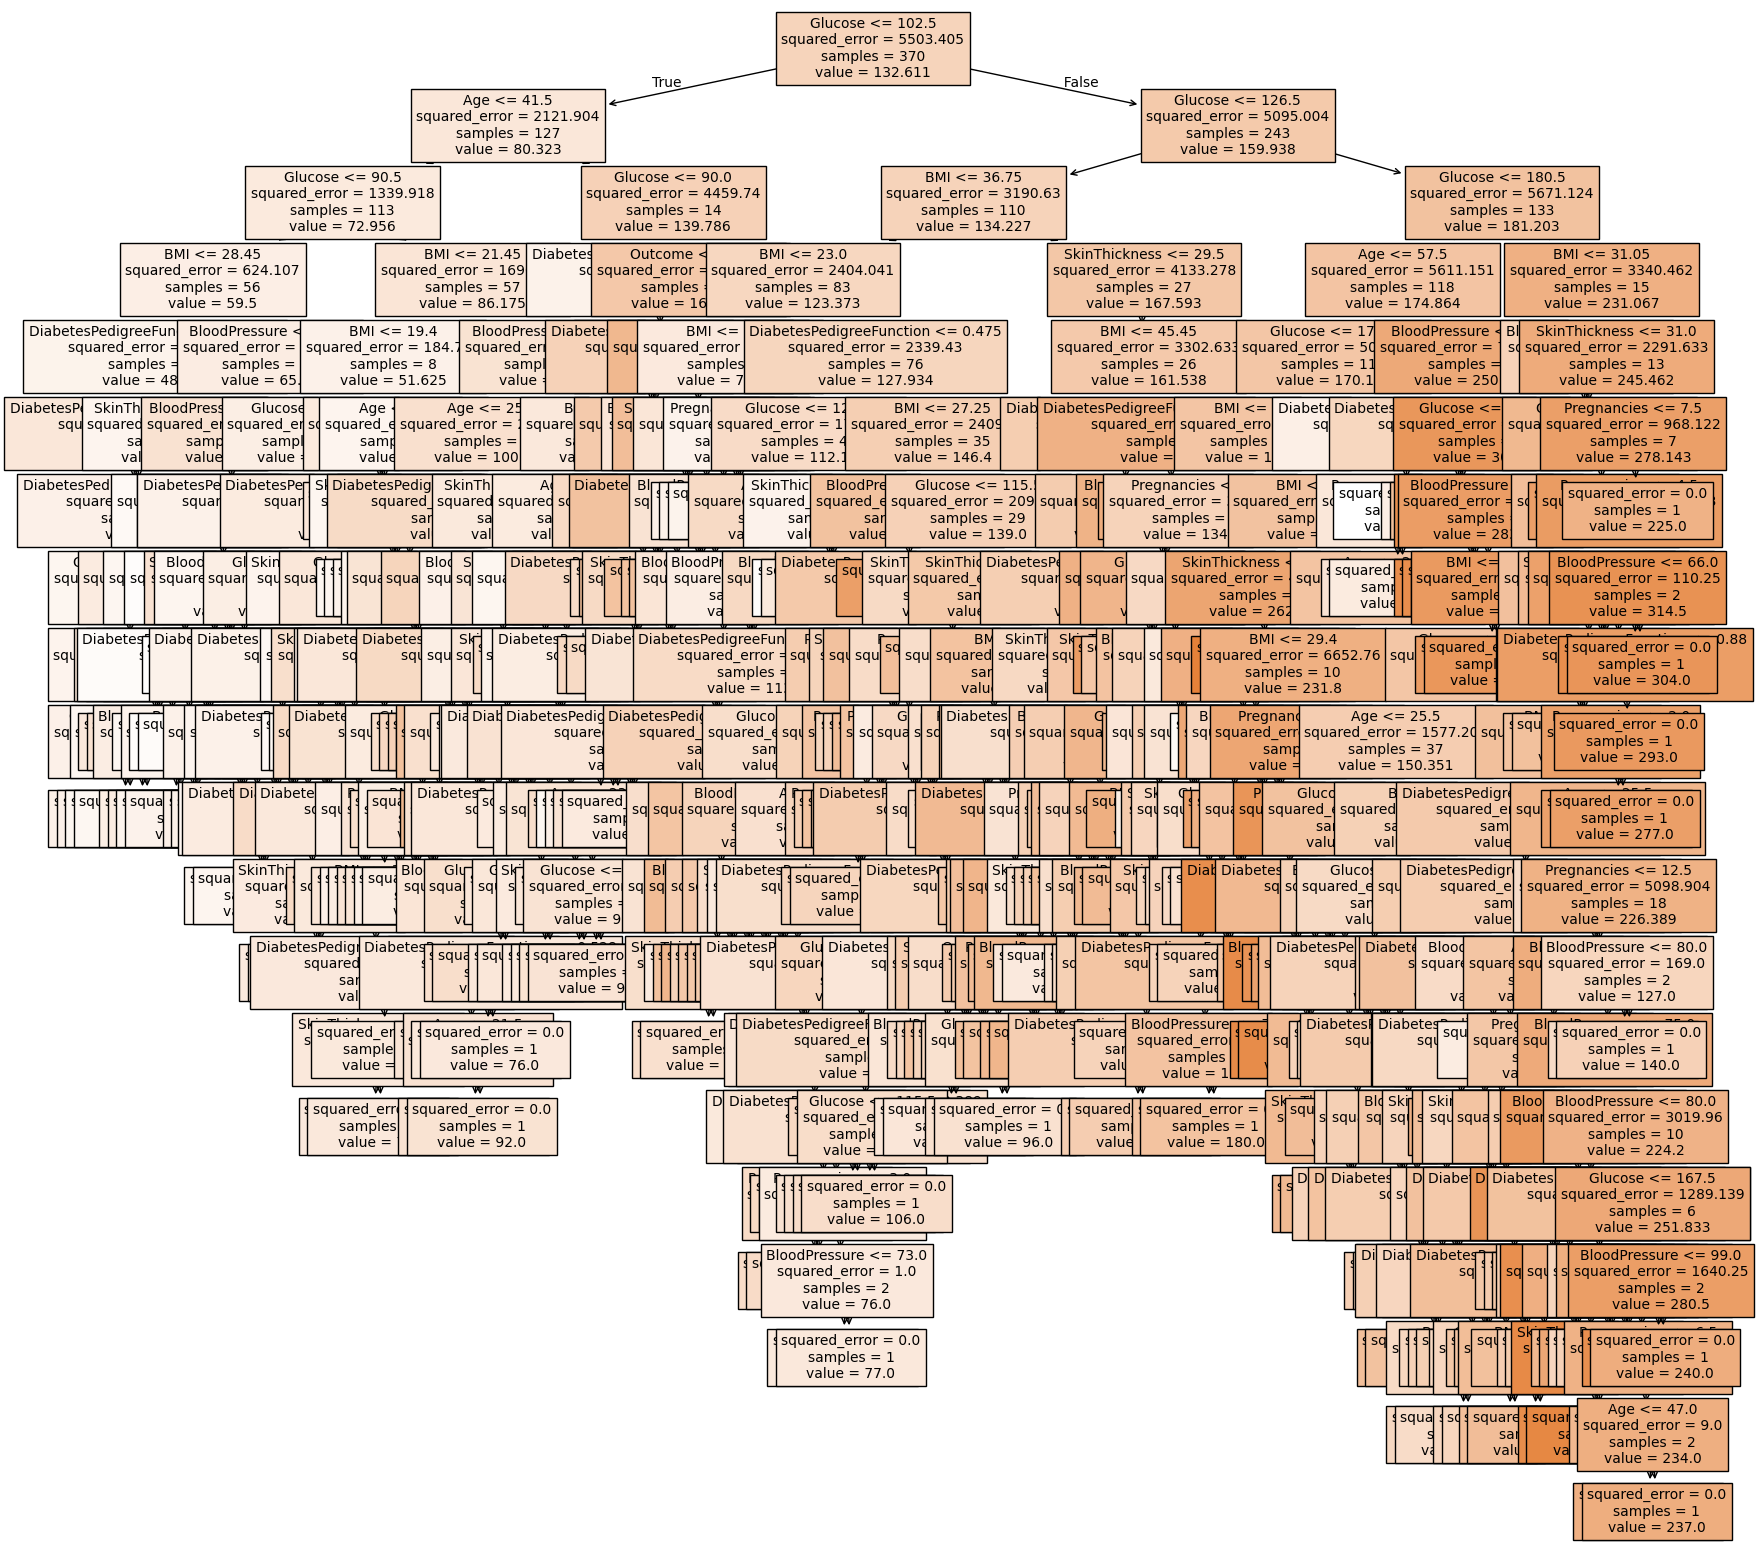

In [77]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree=plot_tree(model,
               feature_names=feature_names,
               filled=True,
               fontsize=10)

In [78]:
model.feature_importances_

array([0.04858345, 0.44656558, 0.07097731, 0.05588694, 0.16087336,
       0.09607089, 0.11025783, 0.01078464])

<Axes: >

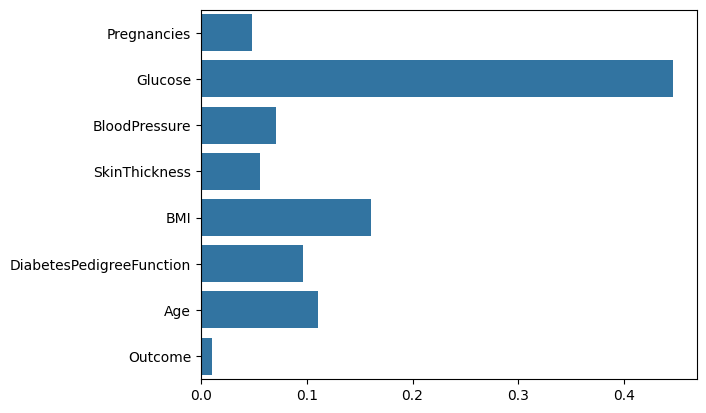

In [79]:
sns.barplot(x=model.feature_importances_,y=feature_names)

In [80]:
y_test=model.predict(X_test)
y_test[:5]

array([168.,  37., 130., 215., 165.])

In [81]:
train.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,254.0,115.917323,69.844697,15.0,64.25,100.0,151.00,342.0
1,116.0,169.163793,70.789454,14.0,124.25,160.0,207.75,360.0


In [82]:
test['Insulin']=y_test

In [83]:
test.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,124.906780,80.878263,18.0,64.00,97.5,155.0,335.0
1,138.0,163.724638,83.718835,14.0,96.75,145.0,215.0,328.0


<Axes: xlabel='Outcome', ylabel='Insulin'>

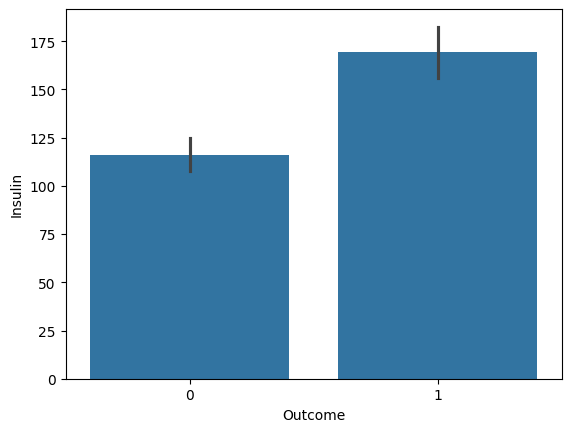

In [84]:
sns.barplot(data=train,x='Outcome',y='Insulin')

<Axes: xlabel='Outcome', ylabel='Insulin'>

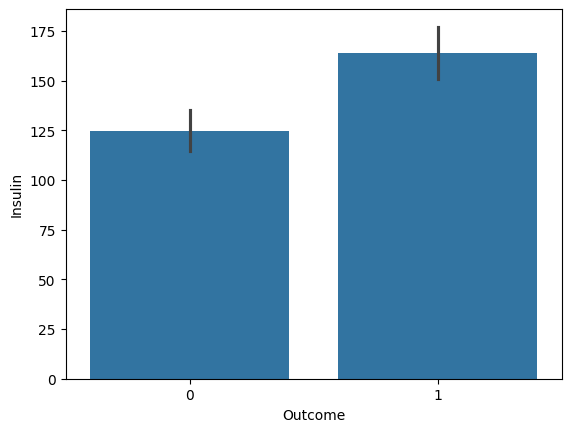

In [85]:
sns.barplot(data=test,x='Outcome',y='Insulin')